In [ ]:
#  Import Libraries
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [2]:
 

# Load dataset
df = pd.read_csv("movielens_with_ratings.csv")
# Dataset overview
df


,userId,movie_id,title,year,directors,actors,genres,rating
0,1,1,toy story,1995,John Lasseter,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,Animation Adventure Comedy Family Fantasy,4
1,1,2,goldeneye,1995,Martin Campbell,Pierce Brosnan Sean Bean Izabella Scorupco Fam...,Action Adventure Thriller,5
2,1,3,four rooms,1995,Allison Anders Alexandre Rockwell Robert Rodri...,Sammi Davis Amanda De Cadenet Valeria Golino M...,Comedy,3
3,1,4,get shorty,1995,Barry Sonnenfeld,John Travolta Gene Hackman Rene Russo Danny De...,Comedy Crime Thriller,5
4,1,5,copycat,1995,Jon Amiel,Sigourney Weaver Holly Hunter Dermot Mulroney ...,Drama Mystery Thriller,5
...,...,...,...,...,...,...,...,...
8400,5,1678,mat i syn,1997,Aleksandr Sokurov,Aleksei Ananishnov Gudrun Geyer,Drama,5
8401,5,1679,b monkey,1998,Michael Radford,Asia Argento Jared Harris Rupert Everett Jonat...,Crime Drama Romance Thriller,2
8402,5,1680,sliding doors,1998,Peter Howitt,Gwyneth Paltrow John Hannah John Lynch Jeanne ...,Comedy Drama Fantasy Romance,2
8403,5,1681,you so crazy,1994,Thomas Schlamme,Martin Lawrence,Documentary Comedy,2


In [3]:
 
# check above 5 row
df.head()


,userId,movie_id,title,year,directors,actors,genres,rating
0,1,1,toy story,1995,John Lasseter,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,Animation Adventure Comedy Family Fantasy,4
1,1,2,goldeneye,1995,Martin Campbell,Pierce Brosnan Sean Bean Izabella Scorupco Fam...,Action Adventure Thriller,5
2,1,3,four rooms,1995,Allison Anders Alexandre Rockwell Robert Rodri...,Sammi Davis Amanda De Cadenet Valeria Golino M...,Comedy,3
3,1,4,get shorty,1995,Barry Sonnenfeld,John Travolta Gene Hackman Rene Russo Danny De...,Comedy Crime Thriller,5
4,1,5,copycat,1995,Jon Amiel,Sigourney Weaver Holly Hunter Dermot Mulroney ...,Drama Mystery Thriller,5


In [4]:
df.tail()

,userId,movie_id,title,year,directors,actors,genres,rating
8400,5,1678,mat i syn,1997,Aleksandr Sokurov,Aleksei Ananishnov Gudrun Geyer,Drama,5
8401,5,1679,b monkey,1998,Michael Radford,Asia Argento Jared Harris Rupert Everett Jonat...,Crime Drama Romance Thriller,2
8402,5,1680,sliding doors,1998,Peter Howitt,Gwyneth Paltrow John Hannah John Lynch Jeanne ...,Comedy Drama Fantasy Romance,2
8403,5,1681,you so crazy,1994,Thomas Schlamme,Martin Lawrence,Documentary Comedy,2
8404,5,1682,scream of stone schrei aus stein,1991,Werner Herzog,Vittorio Mezzogiorno Stefan Glowacz Mathilda M...,Drama,1


In [7]:
#    Data Cleaning
 
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Convert 'year' column to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Fill missing genres with 'Unknown'
df['genres'] = df['genres'].fillna("Unknown")

 




Missing Values:
 userId         0
movie_id       0
title          0
year           0
directors    630
actors       630
genres         0
rating         0
dtype: int64


In [8]:
# Info after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     8405 non-null   int64 
 1   movie_id   8405 non-null   int64 
 2   title      8405 non-null   object
 3   year       8405 non-null   int64 
 4   directors  7775 non-null   object
 5   actors     7775 non-null   object
 6   genres     8405 non-null   object
 7   rating     8405 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 525.4+ KB


In [9]:
df

,userId,movie_id,title,year,directors,actors,genres,rating
0,1,1,toy story,1995,John Lasseter,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,Animation Adventure Comedy Family Fantasy,4
1,1,2,goldeneye,1995,Martin Campbell,Pierce Brosnan Sean Bean Izabella Scorupco Fam...,Action Adventure Thriller,5
2,1,3,four rooms,1995,Allison Anders Alexandre Rockwell Robert Rodri...,Sammi Davis Amanda De Cadenet Valeria Golino M...,Comedy,3
3,1,4,get shorty,1995,Barry Sonnenfeld,John Travolta Gene Hackman Rene Russo Danny De...,Comedy Crime Thriller,5
4,1,5,copycat,1995,Jon Amiel,Sigourney Weaver Holly Hunter Dermot Mulroney ...,Drama Mystery Thriller,5
...,...,...,...,...,...,...,...,...
8400,5,1678,mat i syn,1997,Aleksandr Sokurov,Aleksei Ananishnov Gudrun Geyer,Drama,5
8401,5,1679,b monkey,1998,Michael Radford,Asia Argento Jared Harris Rupert Everett Jonat...,Crime Drama Romance Thriller,2
8402,5,1680,sliding doors,1998,Peter Howitt,Gwyneth Paltrow John Hannah John Lynch Jeanne ...,Comedy Drama Fantasy Romance,2
8403,5,1681,you so crazy,1994,Thomas Schlamme,Martin Lawrence,Documentary Comedy,2


In [ ]:
#    Data Analysis
 

#  Top 5 movies by average rating
avg_movie_ratings = df.groupby('title')['rating'].mean().sort_values(ascending=False)
print("\nTop 5 Movies by Average Rating:\n", avg_movie_ratings.head())

# Average rating per user
avg_user_ratings = df.groupby('userId')['rating'].mean()
print("\nAverage Rating by Each User:\n", avg_user_ratings)



Top 5 Movies by Average Rating:
 title
benhur                           4.8
jade                             4.8
day the earth stood still the    4.8
braveheart                       4.8
big one the                      4.6
Name: rating, dtype: float64

Average Rating by Each User:
 userId
1    2.985128
2    3.045211
3    3.017252
4    3.002380
5    2.962522
Name: rating, dtype: float64


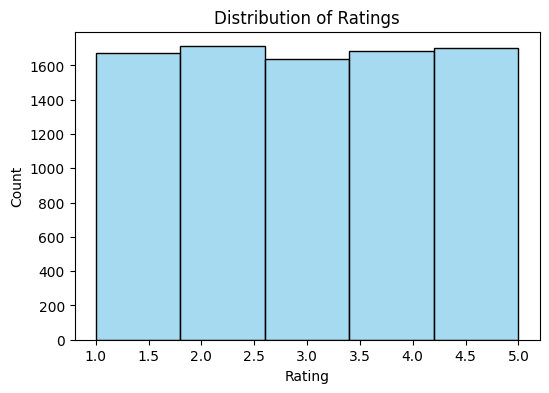

In [ ]:
#  Distribution of Ratings
plt.figure(figsize=(6,4))
sns.histplot(df['rating'], bins=5, kde=False, color="skyblue")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


C:\Users\Uzair Ahmed\AppData\Local\Temp\ipykernel_5812\1501349652.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


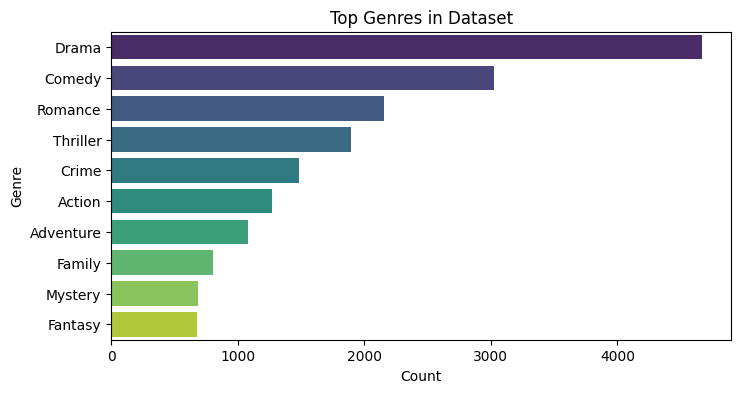

In [ ]:
#  Most frequent genres
genre_counts = df['genres'].str.split(" ").explode().value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Top Genres in Dataset")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


In [17]:
df.columns


Index(['userId', 'movie_id', 'title', 'year', 'directors', 'actors', 'genres',
       'rating', 'liked', 'Action Adventure',
       ...
       'Romance Comedy', 'Romance Drama', 'Romance Western', 'Sci-Fi Thriller',
       'Short', 'Short Music', 'Talk-Show', 'Thriller', 'Unknown', 'Western'],
      dtype='object', length=469)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load dataset
df = pd.read_csv("movielens_with_ratings.csv")

# Create target column
df['liked'] = (df['rating'] >= 4).astype(int)

# Features and Target
X = df.drop(columns=['userId', 'movie_id', 'title', 'rating', 'liked', 'genres'], errors='ignore')
y = df['liked']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# ✅ Save model to file
joblib.dump(model, "movie_recommender.pkl")

print("✅ Model trained and saved as movie_recommender.pkl")


ValueError: could not convert string to float: 'David Cronenberg'

C:\Users\Uzair Ahmed\AppData\Local\Temp\ipykernel_5812\1925307152.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


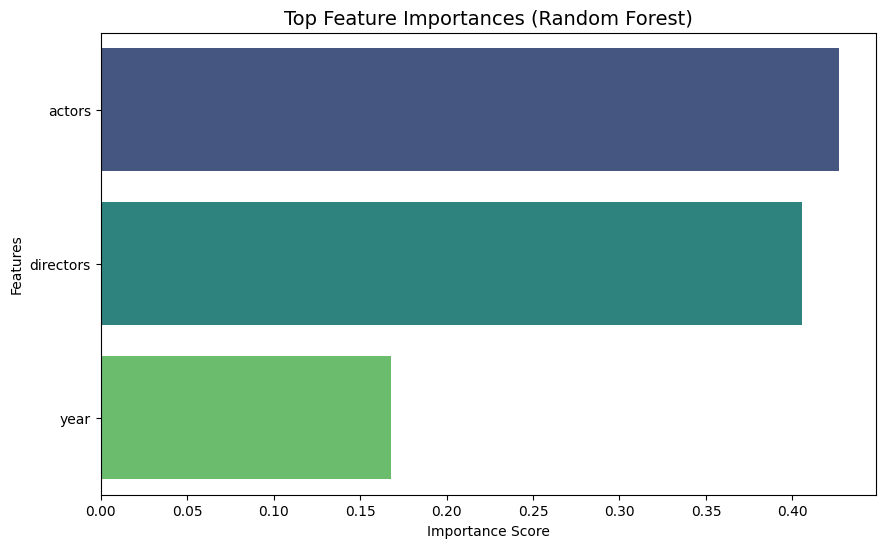

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from Random Forest
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for sorting
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False).head(15)  # Top 15 features

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Top Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("movielens_with_ratings.csv")

# Create target column 'liked'
df['liked'] = (df['rating'] >= 4).astype(int)

# Encode categorical columns (directors, actors)
for col in ['directors', 'actors']:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# Target
y = df['liked']

# Drop unnecessary columns
drop_cols = ['userId', 'movie_id', 'title', 'rating', 'liked', 'genres']
X = df.drop(columns=drop_cols, errors='ignore')

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,      # number of trees
    learning_rate=0.05,    # smaller = more accurate but slower
    max_depth=6,           # depth of trees
    subsample=0.8,         # use 80% of data for each tree
    colsample_bytree=0.8,  # use 80% of features for each tree
    scale_pos_weight=1,    # adjust if classes are imbalanced
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\Uzair Ahmed\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [22:46:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.5443188578227246

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.80      0.68       993
           1       0.37      0.17      0.23       688

    accuracy                           0.54      1681
   macro avg       0.48      0.49      0.45      1681
weighted avg       0.50      0.54      0.49      1681



<Figure size 1000x600 with 0 Axes>

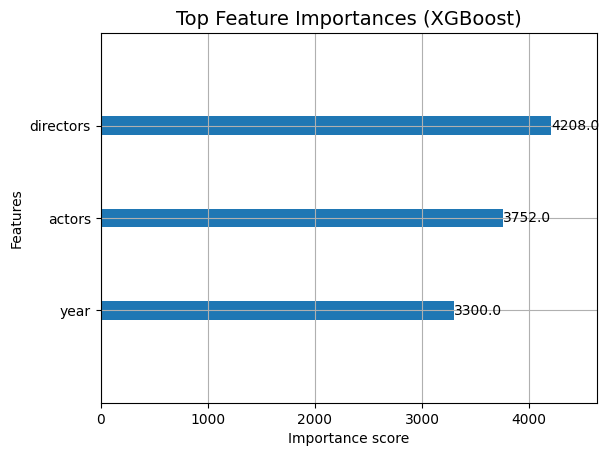

In [ ]:
from xgboost import plot_importance

# Plot XGBoost feature importance
plt.figure(figsize=(10,6))
plot_importance(xgb_model, max_num_features=15, importance_type='weight')  # top 15 features
plt.title("Top Feature Importances (XGBoost)", fontsize=14)
plt.show()
 